In [4]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Russell_1000_Index')[2]

In [3]:
tickers

,Company,Ticker
0,10x Genomics,TXG
1,3M,MMM
2,Abbott,ABT
3,AbbVie,ABBV
4,Abiomed,ABMD
...,...,...
1015,ZimVie,ZIMV
1016,Zions Bancorporation,ZION
1017,Zoetis,ZTS
1018,Zoom,ZM


In [4]:
def find_By_name(name):
    return list(tickers[tickers['Company'] == name].Ticker)[0]

In [5]:
find_By_name('Apple')

'AAPL'

In [39]:
info = yf.Ticker(find_By_name('Apple'))

In [6]:
company = yf.Ticker('TSLA')

In [7]:
company.info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

In [53]:
by_sector = {}
by_industry = {}

In [54]:
for tick in list(tickers.Ticker)[:10]:
    stock = yf.Ticker(tick)
    sector = stock.info['sector']
    industry = stock.info['industry']
    if sector not in by_sector:
        by_sector[sector] = []
        by_sector[sector].append(tick)
    else:
        by_sector[sector].append(tick)
        
    if industry not in by_industry:
        by_industry[industry] = []
        by_industry[industry].append(tick)
    else:
        by_industry[industry].append(tick)
        

In [55]:
by_sector

{'Healthcare': ['TXG', 'ABT', 'ABBV', 'ABMD', 'ACHC', 'ADPT'],
 'Industrials': ['MMM', 'AYI'],
 'Technology': ['ACN'],
 'Communication Services': ['ATVI']}

In [57]:
by_industry

{'Health Information Services': ['TXG'],
 'Conglomerates': ['MMM'],
 'Medical Devices': ['ABT', 'ABMD'],
 'Drug Manufacturers—General': ['ABBV'],
 'Medical Care Facilities': ['ACHC'],
 'Information Technology Services': ['ACN'],
 'Electronic Gaming & Multimedia': ['ATVI'],
 'Electrical Equipment & Parts': ['AYI'],
 'Biotechnology': ['ADPT']}

## Tesla

In [8]:
df = yf.download('TSLA', period='1y')

[*********************100%***********************]  1 of 1 completed


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16205300
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000
...,...,...,...,...,...,...
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300
2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700
2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100


In [35]:
df.loc['2022-05-02']['Open']

860.77001953125

In [36]:
df.loc['2022-05-25']['Open']

623.8499755859375

In [32]:
(df.loc['2022-05-02']['Open'] - df.loc['2022-05-25']['Open'])/df.loc['2022-05-02']['Open']

0.2752419793551037

In [6]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

In [2]:
import pandas_datareader.data as pdr
from datetime import date

In [3]:
def plot_stock(start, end, ticker, normalize_factor):
    
    fig, ax = plt.subplots(figsize = (16,9))
 
    spx_index = pdr.get_data_stooq('^SPX', start, end)
    
    df = yf.download(ticker , start, end)
    rolling_mean = df['Close'].rolling(window=10).mean()

    ax.set_xlabel('Date')
    ax.set_ylabel('Price, $')
    ax = plt.plot(df.index, df['Close'], label=f'{ticker} close price')
    ax = plt.plot(df.index, rolling_mean, label='10 days rolling mean')
    ax = plt.plot(spx_index.index, spx_index['Close']/normalize_factor,
                  label=f'S&P500 Index close price/{normalize_factor}')
    plt.legend();

[*********************100%***********************]  1 of 1 completed


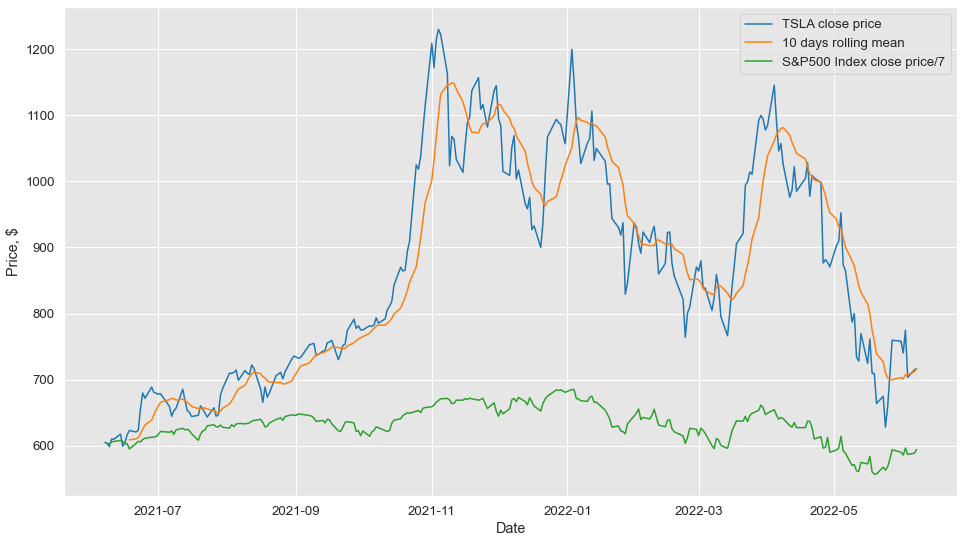

In [98]:
plot_stock('2021-06-08', '2022-06-08', 'TSLA', 7)

## Apple

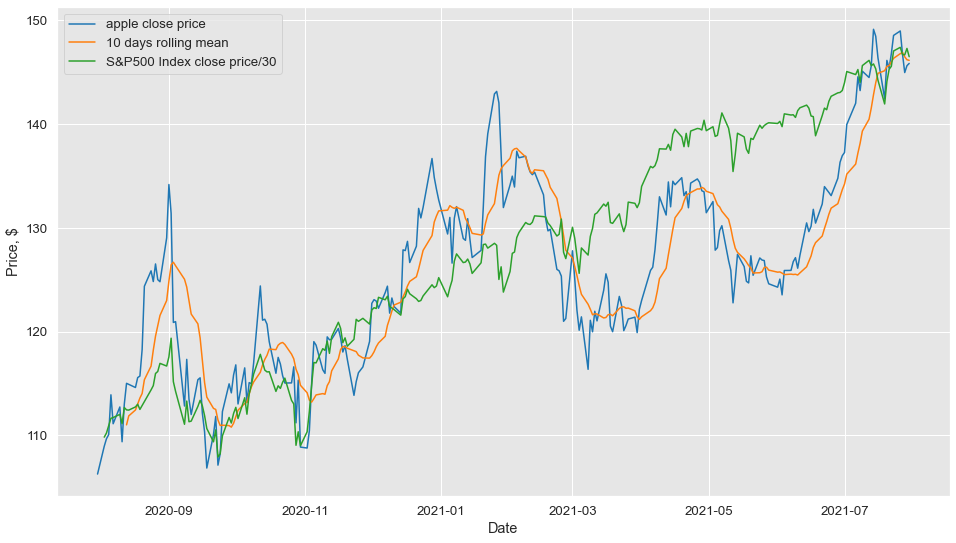

In [88]:
fig, ax = plt.subplots(figsize = (16,9))
rolling_mean = df['Close'].rolling(window=10).mean()

ax.set_xlabel('Date')
ax.set_ylabel('Price, $')
ax = plt.plot(df.index, df['Close'], label='apple close price')
ax = plt.plot(df.index, rolling_mean, label='10 days rolling mean')
ax = plt.plot(spx_index.index, spx_index['Close']/30, label='S&P500 Index close price/30')
plt.legend();

### Black Rock

[*********************100%***********************]  1 of 1 completed


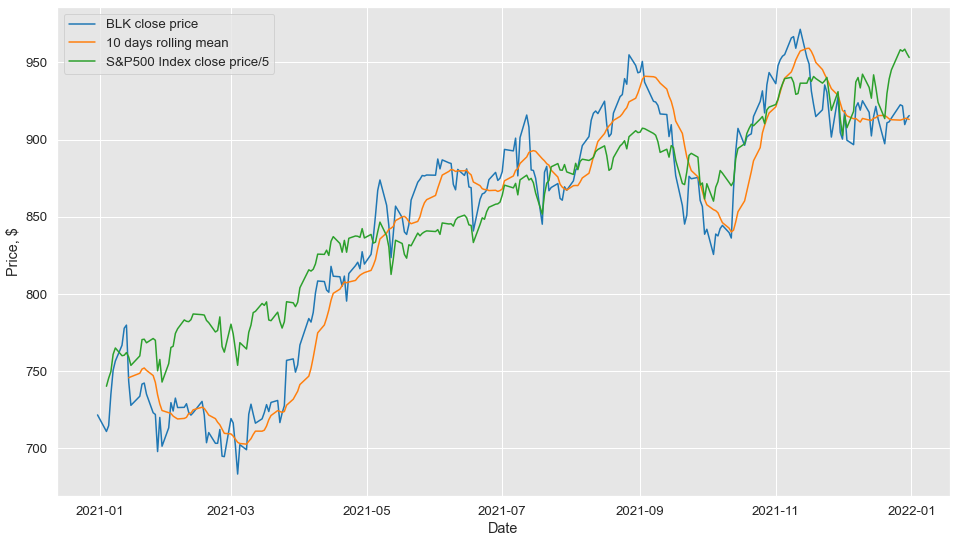

In [9]:
plot_stock('2021-01-01', '2022-01-01', 'BLK', 5)

In [11]:
df = yf.download('BLK' , '2021-01-01', '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [14]:
df.loc['2021-01-12']['Close']

777.739990234375

In [19]:
df.loc['2021-03-04']['Close']

683.2100219726562

In [20]:
(df.loc['2021-01-12']['Close'] - df.loc['2021-03-04']['Close'])/df.loc['2021-01-12']['Close']

0.12154443573517645

In [28]:
normalize_factor = 5

[*********************100%***********************]  1 of 1 completed


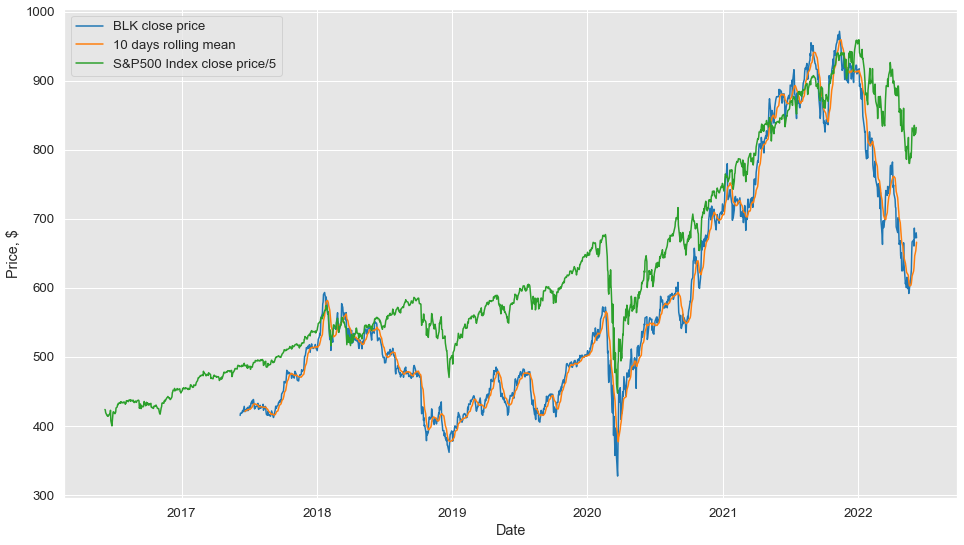

In [30]:
fig, ax = plt.subplots(figsize = (16,9))

spx_index = pdr.get_data_stooq('^SPX', '2016-06-08', '2022-06-08')

df = yf.download('BLK', period='5y')
rolling_mean = df['Close'].rolling(window=10).mean()

ax.set_xlabel('Date')
ax.set_ylabel('Price, $')
ax = plt.plot(df.index, df['Close'], label='BLK close price')
ax = plt.plot(df.index, rolling_mean, label='10 days rolling mean')
ax = plt.plot(spx_index.index, spx_index['Close']/normalize_factor,
              label=f'S&P500 Index close price/{normalize_factor}')
plt.legend();